In [31]:
import graphviz as graphviz
import tree as tree

import lexnorm.models.normalise
from lexnorm.definitions import DATA_PATH
import os
import pandas as pd

train = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_ngrams.txt"), index_col=0, keep_default_na=False, na_values="")
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_ngrams.txt"), index_col=0, keep_default_na=False, na_values="")

In [32]:
from sklearn.svm import LinearSVC
dev

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,...,next,process,tweet,tok,twitter_uni,twitter_bi_prev,twitter_bi_next,wiki_uni,wiki_bi_prev,wiki_bi_next
an,0.377180,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2,NaN,...,you,35,0,2,44841230,0.000000,0.000645,9348289,0.0,7.488001e-07
ca,0.255824,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2,NaN,...,you,35,0,2,779786,0.000000,0.001702,13058,0.0,0.000000e+00
cab,0.261057,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3,NaN,...,you,35,0,2,197597,0.000000,0.004838,13063,0.0,0.000000e+00
cam,0.299136,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3,NaN,...,you,35,0,2,1000282,0.000000,0.006341,10015,0.0,0.000000e+00
can,1.000000,NaN,NaN,1.0,NaN,72.0,NaN,1.0,3,1.0,...,you,35,0,2,71160951,0.000001,0.083374,1938264,0.0,1.226355e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lulu,0.401415,NaN,NaN,NaN,NaN,NaN,15.0,1.0,4,NaN,...,"""",32,9,25,71752,0.000000,0.000181,3345,0.0,0.000000e+00
pol,0.230619,NaN,NaN,NaN,NaN,NaN,10.0,1.0,3,NaN,...,"""",32,9,25,55886,0.000000,0.000072,3705,0.0,0.000000e+00
smh,0.896277,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,"""",32,9,25,4365260,0.000056,0.000154,135,0.0,0.000000e+00
sol,0.285978,NaN,NaN,NaN,NaN,NaN,4.0,1.0,3,NaN,...,"""",32,9,25,130095,0.000000,0.000300,9006,0.0,3.331113e-04


In [33]:
train.fillna(0, inplace=True)
dev.fillna(0, inplace=True)
X_train = train.drop(["correct", "process", "tweet", "tok", "gold", "raw", "prev", "next"], axis=1)
X_dev = dev.drop(["process", "tweet", "tok", "raw", "prev", "next"], axis=1)
y_train = train["correct"]

In [36]:
X_dev

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,twitter_uni,twitter_bi_prev,twitter_bi_next,wiki_uni,wiki_bi_prev,wiki_bi_next
an,0.627653,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,1.195236,0.227769,-2.076705,-3.048499,-0.663646,0.337691,0.0,0.416862,1.501276,-0.148572,-0.120367,2.384874,-0.122505,-0.121960
ca,0.057893,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,1.565143,0.227769,-2.076705,-3.048499,-0.663646,0.337691,0.0,0.416862,-0.064304,-0.148572,-0.080547,-0.054789,-0.122505,-0.121987
cab,0.082459,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,0.455422,0.227769,-1.746082,-3.048499,-0.663646,0.337691,0.0,0.416862,-0.084990,-0.148572,0.037614,-0.054788,-0.122505,-0.121987
cam,0.261241,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,0.825329,0.227769,-1.746082,-3.048499,-0.663646,0.337691,0.0,0.416862,-0.056469,-0.148572,0.094242,-0.055585,-0.122505,-0.121987
can,3.551773,-0.170470,-2.474822,10.217216,-0.04862,4.885382,-0.284392,0.227769,-1.746082,0.328030,-0.663646,0.337691,0.0,0.416862,2.436461,-0.148520,2.996429,0.448343,-0.122505,-0.077587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lulu,0.741435,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,5.264212,0.227769,-1.415459,-3.048499,0.230612,0.337691,0.0,0.416862,-0.089461,-0.148572,-0.137834,-0.057328,-0.122505,-0.121987
pol,-0.060446,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,3.414678,0.227769,-1.746082,-3.048499,0.230612,0.337691,0.0,0.416862,-0.090025,-0.148572,-0.141963,-0.057234,-0.122505,-0.121987
smh,3.064797,1.999929,-2.474822,-0.097874,-0.04862,-0.048873,-0.284392,-4.390404,-1.746082,-3.048499,0.230612,0.337691,0.0,0.416862,0.063094,-0.146468,-0.138869,-0.058167,-0.122505,-0.121987
sol,0.199462,-0.170470,-2.474822,-0.097874,-0.04862,-0.048873,1.195236,0.227769,-1.746082,-3.048499,0.230612,0.337691,0.0,0.416862,-0.087388,-0.148572,-0.133366,-0.055848,-0.122505,-0.109927


In [35]:
from sklearn import preprocessing

feature_vals = X_train.values
scaler = preprocessing.StandardScaler().fit(feature_vals)
feature_vals = scaler.transform(feature_vals)
X_train[:] = feature_vals

feature_vals = X_dev.values
scaler = preprocessing.StandardScaler().fit(feature_vals)
feature_vals = scaler.transform(feature_vals)
X_dev[:] = feature_vals

In [ ]:
svm = LinearSVC(class_weight="balanced", verbose=1).fit(X_train, y_train.values.ravel())

[LibLinear]..............................

In [3]:
from joblib import dump, load
dump(svm, os.path.join(DATA_PATH, "../models/svm.joblib"))
test = load(os.path.join(DATA_PATH, "../models/svm.joblib"))
test.coef_

NameError: name 'svm' is not defined

In [134]:
preds = svm.decision_function(X_dev)

In [81]:
svm.score(X_dev, y_dev)

0.9983700596728575

In [153]:
X_train

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length
nah,2.656120,3.877197,-2.593884,-0.094405,-0.046030,-0.048241,-0.268871,-4.348835,-1.763720,-3.155060,-1.057043,0.345895,0.0,1.361154
oh,2.745444,2.535195,-2.593884,-0.094405,-0.046030,-0.048241,-0.268871,0.229947,-2.095137,-3.155060,-1.057043,0.345895,0.0,1.361154
uh,2.624856,5.219199,-2.593884,-0.094405,-0.046030,-0.048241,-0.268871,0.229947,-2.095137,-3.155060,-1.057043,0.345895,0.0,1.361154
ye ah,-1.138580,-0.148809,-2.593884,-0.094405,21.724887,-0.048241,1.360023,-4.348835,-1.100884,0.316951,-1.057043,0.345895,0.0,1.361154
ye-ah,-1.138580,-0.148809,-2.593884,-0.094405,-0.046030,-0.048241,1.767247,-4.348835,-1.100884,0.316951,-1.057043,0.345895,0.0,1.361154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
upward,0.569510,-0.148809,0.385522,-0.094405,-0.046030,-0.048241,-0.268871,0.229947,-0.769467,0.316951,-0.688526,0.345895,0.0,-0.462068
upwardly,0.702616,-0.148809,0.385522,-0.094405,-0.046030,-0.048241,-0.268871,0.229947,-0.106631,0.316951,-0.688526,0.345895,0.0,-0.462068
upwards,0.833669,-0.148809,0.385522,-0.094405,-0.046030,-0.048241,-0.268871,0.229947,-0.438049,0.316951,-0.688526,0.345895,0.0,-0.462068
us,1.122110,-0.148809,-2.593884,-0.094405,-0.046030,-0.048241,2.988917,0.229947,-2.095137,-3.155060,-0.688526,0.345895,0.0,-0.462068


In [149]:
dev["preds"] = preds
dev.loc[(dev.process == 0) & (dev.tweet == 0) & (dev.tok == 4)]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,process,tweet,tok,preds
citch,0.756863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,1.0,1.0,1.0,2.0,0,0,4,-1.731161
co,0.240537,0.0,0.0,0.0,0.0,0.0,14.0,0.0,2,0.0,1.0,1.0,1.0,2.0,0,0,4,-2.434154
hoe,0.741933,4.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,1.0,1.0,1.0,2.0,0,0,4,-1.538175
lo,0.361795,0.0,0.0,0.0,0.0,0.0,13.0,1.0,2,0.0,1.0,1.0,1.0,2.0,0,0,4,-1.583027
nigga,0.742659,3.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0.0,1.0,1.0,1.0,2.0,0,0,4,-1.389208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yowl's,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6,1.0,1.0,1.0,1.0,2.0,0,0,4,-1.555294
yowled,0.283298,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6,1.0,1.0,1.0,1.0,2.0,0,0,4,-1.327322
yowling,0.225846,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7,1.0,1.0,1.0,1.0,2.0,0,0,4,-1.390141
yowls,0.204925,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5,1.0,1.0,1.0,1.0,2.0,0,0,4,-1.373803


In [137]:
# get top prediction for each raw token
predictions = dev.sort_values("preds", ascending=False).drop_duplicates(["process", "tweet", "tok"])
pred_tokens = predictions.sort_values(["process", "tweet", "tok"]).index.tolist()
pred_tokens

['brother',
 'get',
 'out',
 'yo',
 'feelings',
 'lol',
 'manan',
 'dund',
 'xaragdax',
 'ter',
 'uuliin',
 'oroid',
 'minii',
 'aav',
 'xezee',
 'neg',
 'cagt',
 'zogsoj',
 'baisan',
 'photo',
 'by',
 'why',
 'dese',
 'niggers',
 'think',
 'dey',
 'doin',
 'summn',
 "it's",
 'about',
 'more',
 'than',
 'number',
 'brother',
 'and',
 "i'm",
 'not',
 'talkn',
 'about',
 'statistics',
 "i'm",
 'talkn',
 'about',
 'skill',
 'level',
 'yes',
 'omg',
 'i',
 "don't",
 'want',
 'him',
 'feeling',
 'unappreciated',
 'or',
 'stuff',
 'like',
 'that',
 'lmao',
 'the',
 'whole',
 'time',
 'actually',
 'we',
 'need',
 'to',
 'start',
 'our',
 'own',
 'team',
 "y'all",
 'were',
 'wilding',
 'last',
 'nigjt',
 'yoh',
 'niya',
 'ja',
 'saying',
 'kau',
 'aku',
 'with',
 'couple',
 'is',
 'actually',
 'sweet',
 'k',
 'michelle',
 'met',
 'yo',
 'match',
 'that',
 'fonk',
 'rana',
 'samaha',
 'ignore',
 'all',
 'the',
 'criticism',
 'a',
 'spotlight',
 'can',
 'never',
 'see',
 'the',
 'shadows',
 'any

In [22]:
from lexnorm.data.normEval import loadNormData

raw, norm = loadNormData(os.path.join(DATA_PATH, "raw/dev.norm"))

In [199]:
from lexnorm.generate_extract.filtering import is_eligible

pred_tokens_iter = iter(pred_tokens)

pred_tweets = []

for tweet in raw:
    pred_tweet = []
    for tok in tweet:
        if is_eligible(tok):
            pred_tweet.append(next(pred_tokens_iter))
        else:
            pred_tweet.append(tok)
    pred_tweets.append(pred_tweet)

NameError: name 'pred_tokens' is not defined

In [24]:
from lexnorm.data.normEval import evaluate

evaluate(raw, norm, pred_tweets)
# pretty bad. Some reasons: not good enough feature extraction, using a linear svm when data might not be linearly seperable in our feature space (may need different kernel), set non-calculated/absent values to zero which can be picked up by a random forest but NOT by most models! May need to give highest possible value instead.

Baseline acc.(LAI): 93.10
Accuracy:           96.28
ERR:                46.13


(0.9309630275929763, 0.9628094666812084, 0.4612954186413895)

In [157]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(svm, X_dev[:, :2])

InvalidIndexError: (slice(None, None, None), slice(None, 2, None))

In [4]:
from joblib import load
import os
from lexnorm.definitions import DATA_PATH
rd_clf = load(os.path.join(DATA_PATH, "../models/rf.joblib"))

In [198]:
rd_clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

In [12]:
rd_clf.oob_score_

0.9995261407341941

In [200]:
rd_clf.decision_path(X_dev)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


KeyboardInterrupt: 

In [223]:
rd_clf.feature_names_in_

array(['cosine_to_orig', 'embeddings_rank', 'from_clipping',
       'from_original_token', 'from_split', 'norms_seen',
       'spellcheck_rank', 'in_lexicon', 'length', 'same_order',
       'orig_norms_seen', 'orig_in_lexicon', 'orig_same_order',
       'orig_length'], dtype=object)

In [17]:
rd_clf.feature_importances_

array([2.52070851e-01, 4.31976125e-03, 7.92054467e-03, 1.64534043e-01,
       1.61258200e-04, 4.01924066e-01, 3.03852361e-03, 7.35963146e-03,
       6.02726879e-02, 9.02983575e-03, 3.24685801e-02, 7.44901879e-03,
       0.00000000e+00, 4.94511981e-02])

In [8]:
preds = rd_clf.predict_proba(X_dev)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


In [9]:
dev["preds"] = preds[:, 1]
predictions = dev.sort_values("preds", ascending=False).drop_duplicates(["process", "tweet", "tok"])
pred_tokens = predictions.sort_values(["process", "tweet", "tok"]).index.tolist()
pred_tokens

['brother',
 'get',
 'out',
 'you',
 'feelings',
 'lol',
 'manan',
 'dund',
 'paradox',
 'ter',
 'insulin',
 'oroid',
 'minii',
 'aav',
 'xezee',
 'neg',
 'cagt',
 'couscous',
 'baisan',
 'photo',
 'by',
 'why',
 'dese',
 'niggers',
 'think',
 'dey',
 'doing',
 'summn',
 "it's",
 'about',
 'more',
 'than',
 'number',
 'brother',
 'and',
 "i'm",
 'not',
 'talking',
 'about',
 'statistics',
 "i'm",
 'talking',
 'about',
 'skill',
 'level',
 'yes',
 'omg',
 'i',
 "don't",
 'want',
 'him',
 'feeling',
 'unappreciated',
 'or',
 'stuff',
 'like',
 'that',
 'lmao',
 'the',
 'whole',
 'time',
 'actually',
 'we',
 'need',
 'to',
 'start',
 'our',
 'own',
 'team',
 "y'all",
 'were',
 'wilding',
 'last',
 'nigjt',
 'yoh',
 'niya',
 'ja',
 'saying',
 'kau',
 'aku',
 'with',
 'couple',
 'is',
 'actually',
 'sweet',
 'k',
 'michelle',
 'met',
 'you',
 'match',
 'that',
 'fonk',
 'rana',
 'samaha',
 'ignore',
 'all',
 'the',
 'criticism',
 'a',
 'spotlight',
 'can',
 'never',
 'see',
 'the',
 'shadow

In [35]:
from lexnorm.generate_extract.filtering import is_eligible
from lexnorm.data.normEval import loadNormData, evaluate
raw, norm = loadNormData(os.path.join(DATA_PATH, "raw/dev.norm"))
# pred_tokens_iter = iter(pred_tokens)
#
# pred_tweets = []
#
# for tweet in raw:
#     pred_tweet = []
#     for tok in tweet:
#         if is_eligible(tok):
#             pred_tweet.append(next(pred_tokens_iter))
#         else:
#             pred_tweet.append(tok)
#     pred_tweets.append(pred_tweet)

In [14]:
# better!!
evaluate(raw, norm, pred_tweets)

Baseline acc.(LAI): 93.10
Accuracy:           96.28
ERR:                46.13


(0.9309630275929763, 0.9628094666812084, 0.4612954186413895)

In [234]:
preds

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [39]:
import pandas as pd
import os
from lexnorm.definitions import DATA_PATH

train = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_processed_annotated.txt"), index_col=0)
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_processed.txt"), index_col=0)

In [29]:
train.loc[(train['process'] == 63) & (train['tweet'] == 0) & (train['tok'] == 2)]

AttributeError: 'function' object has no attribute 'loc'

In [25]:
from lexnorm.data.word2vec import get_vectors

vectors = get_vectors(os.path.join(DATA_PATH, "raw/train.norm"))

In [26]:
from lexnorm.generate_extract.modules import word_embeddings

word_embeddings("yeah", vectors)

/Users/elijoe/Library/Mobile Documents/com~apple~CloudDocs/Documents/2/Diss/lexnorm/.venv/lib/python3.10/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


,cosine_to_orig,embeddings_rank
yea,0.912848,1
yes,0.821176,2
oh,0.817392,3
nah,0.798594,4
uh,0.792015,5


In [40]:
# from lexnorm.models.random_forest import train

dev.groupby(["process", "tweet", "tok"]).size()

process  tweet  tok
0        0      1       16
                2       34
                3      291
                4      113
                5       11
                      ... 
58       9      10      49
                11      55
                12      38
                13       6
                14       1
Length: 6876, dtype: int64

In [42]:
count = 0

for tweet in raw:
    for tok in tweet:
        if is_eligible(tok):
            count += 1

print(count)
# as expected - candidates generated for every eligible raw token

6876


In [62]:
from lexnorm.models.normalise import prep_test, normalise
import joblib

from lexnorm.models import random_forest
clf = joblib.load(os.path.join(DATA_PATH, "../models/rf.joblib"))
dev_X = prep_test(os.path.join(DATA_PATH, "hpc/dev_processed.txt"))
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_processed.txt"), index_col=0)
preds = random_forest.predict(clf, dev_X, dev)
predictions = normalise(raw, preds)

NameError: name 'lexnorm' is not defined

In [59]:
evaluate(raw, norm, predictions, verbose=True)

yo your you
xaragdax xaragdax paradox
uuliin uuliin insulin
zogsoj zogsoj couscous
dese these dese
dey they dey
summn something summn
nigjt night nigjt
shettima shettima estimate
realised realized realised
hella hell of a lot of hella
bestie best friend bestie
chillen chilling chillen
niggra nigger niggra
yellowcard yellow card yellowcard
da da the
factor factor factoring
darlin darling darlin
smyle smile smyle
sadest saddest sadest
tenerezza tenerezza containerize
wkeend weekend keen
bro brother bro
babyface baby face babyface
orrr or orrr
noo no noo
readers readers reviewers
ammmazing amazing ammmazing
actully actually actully
id i'd id
ohhh ohhh oh
contactmusic contactmusic contact music
datpiff the piff datpiff
soundcloud sound cloud soundcloud
sunshelter sunshelter sun shelter
jumpseat jumpseat jump seat
sensual sensual seductive
toribash toribash retribution
diy do it yourself diy
oookay okay oookay
headass head ass headass
niyata niyata lanyard
flavour flavor flavour
n n and
bro

(0.9309630275929763, 0.9629185298287709, 0.4628751974723546)

In [66]:
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_processed_annotated.txt"), index_col=0)
print(dev.groupby(["process", "tweet", "tok"]).size().mean())
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_annotated.txt"), index_col=0)
print(dev.groupby(["process", "tweet", "tok"]).size().mean())

114.09050270864114
113.20335644201992


In [83]:
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_annotated.txt"), index_col=0)
dev.loc[(dev['process'] == 63) & (dev['tweet'] == 0) & (dev['tok'] == 2)]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,correct,process,tweet,tok,gold
nah,0.798594,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
oh,0.817392,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
uh,0.792014,4.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
ye ah,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,5,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
ye-ah,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
yea,0.912848,0.0,NaN,NaN,NaN,NaN,0.0,1.0,3,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
yea h,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,5,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
yea-h,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,5,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
yeah,1.000000,NaN,1.0,1.0,NaN,18.0,NaN,1.0,4,1.0,18.0,1.0,1.0,4.0,1.0,63,0,2,yeah
yeah's,0.587786,NaN,1.0,NaN,NaN,NaN,NaN,1.0,6,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah


In [82]:
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_processed_annotated.txt"), index_col=0)
dev.loc[(dev['process'] == 63) & (dev['tweet'] == 0) & (dev['tok'] == 2)]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,raw,gold,correct,process,tweet,tok
leah,0.384448,NaN,NaN,NaN,NaN,NaN,5.0,1.0,4,NaN,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
nah,0.798594,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
oh,0.817392,4.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
uh,0.792014,6.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
ye ah,NaN,NaN,NaN,NaN,1.0,NaN,6.0,NaN,5,1.0,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
ye-ah,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,5,1.0,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
yea,0.912848,1.0,NaN,NaN,NaN,NaN,1.0,1.0,3,NaN,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
yea h,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,5,1.0,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
yea-h,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,5,1.0,18.0,1.0,1.0,4.0,yeah,yeah,NaN,63,0,2
yeah,1.000000,2.0,NaN,1.0,NaN,18.0,NaN,1.0,4,1.0,18.0,1.0,1.0,4.0,yeah,yeah,1.0,63,0,2


In [77]:
clf.predict_log_proba("test")

/Users/elijoe/Library/Mobile Documents/com~apple~CloudDocs/Documents/2/Diss/lexnorm/.venv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'test'

In [116]:
import importlib
from lexnorm.generate_extract import modules
from lexnorm.generate_extract import candidate_generation
importlib.reload(modules)

modules.word_embeddings("the", vectors)

/Users/elijoe/Library/Mobile Documents/com~apple~CloudDocs/Documents/2/Diss/lexnorm/.venv/lib/python3.10/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


,cosine_to_orig,embeddings_rank
The,0.757326,1


In [251]:
from lexnorm.models import normalise

importlib.reload(normalise)

train1 = normalise.prep_train(os.path.join(DATA_PATH, "hpc/train_processed_annotated.txt"))
# dev.loc[(dev['process'] == 35) & (dev['tweet'] == 0) & (dev['tok'] == 2)]
# dev[dev.index.map(lambda x: isinstance(x, float))]
train1 = train1[0]
train1filtered = train1.loc[train1.index.map(lambda x: not any(c.isupper() for c in x))]
train1
# TODO ARGHHHH maybe just revert to ignoring uppercase suggestions - this is a mess. Come back with a clearer head. Remove uppercase suggestions and try again

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,initial_capital,lowercase,uppercase
Leah,0.220881,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4,0.0,18.0,1.0,1.0,4.0,1,0,0
Yea,0.780648,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,18.0,1.0,1.0,4.0,1,0,0
Yeah,0.834787,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,18.0,1.0,1.0,4.0,1,0,0
nah,0.798594,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,18.0,1.0,1.0,4.0,0,1,0
oh,0.817392,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0,18.0,1.0,1.0,4.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ilysfm,0.867017,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,7.0,0.0,1.0,5.0,0,1,0
ilysm,1.000000,0.0,0.0,1.0,0.0,7.0,0.0,0.0,5,1.0,7.0,0.0,1.0,5.0,0,1,0
lysm,0.855508,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,7.0,0.0,1.0,5.0,0,1,0
silly,0.200586,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5,0.0,7.0,0.0,1.0,5.0,0,1,0


In [196]:
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_annotated.txt"), index_col=0, keep_default_na=False, na_values="")
# dev.loc[(dev['process'] == 35) & (dev['tweet'] == 0) & (dev['tok'] == 2)]
dev

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,correct,process,tweet,tok,gold
nah,0.798594,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
oh,0.817392,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
uh,0.792014,4.0,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
ye ah,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,5,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
ye-ah,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5,1.0,18.0,1.0,1.0,4.0,NaN,63,0,2,yeah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poppn,0.861424,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,1.0,6.0,NaN,24,36,600,popping
popppin,0.820347,4.0,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,NaN,NaN,1.0,6.0,NaN,24,36,600,popping
propping,0.259834,NaN,NaN,NaN,NaN,NaN,5.0,1.0,8,1.0,NaN,NaN,1.0,6.0,NaN,24,36,600,popping
pupping,0.272816,NaN,NaN,NaN,NaN,NaN,9.0,1.0,7,NaN,NaN,NaN,1.0,6.0,NaN,24,36,600,popping


In [222]:
import numpy as np

train1filtered.loc[train1filtered.index.to_series().isin(dev.index.to_series())==False]
# TODO: the difference in predictions

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,initial_capital,lowercase,uppercase
2 2,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1.0,1.0,0.0,1.0,2.0,0,0,0
2-2,0.339055,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3,1.0,1.0,0.0,1.0,2.0,0,0,0
150,0.931679,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,2.0,0.0,1.0,4.0,0,0,0
250,0.941498,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,2.0,0.0,1.0,4.0,0,0,0
400,0.939982,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,2.0,0.0,1.0,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,0.945421,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,4.0,0,0,0
1976,0.934110,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,4.0,0,0,0
1977,0.944008,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,4.0,0,0,0
1978,0.951944,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,4.0,0,0,0


In [231]:
train1.loc[train1.index.to_series().isin(dev.index.to_series())==False]
# the difference is entirely from embeddings and spellcheck module putting out stuff that isn't lowercase!

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,initial_capital,lowercase,uppercase
Leah,0.220881,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4,0.0,18.0,1.0,1.0,4.0,1,0,0
Yea,0.780648,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,18.0,1.0,1.0,4.0,1,0,0
Yeah,0.834787,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,18.0,1.0,1.0,4.0,1,0,0
Hahn,0.188633,0.0,0.0,0.0,0.0,0.0,6.0,0.0,4,0.0,67.0,0.0,1.0,4.0,1,0,0
Hannah,0.186623,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6,0.0,67.0,0.0,1.0,4.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Camilla,0.393767,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,0.0,2.0,0.0,1.0,6.0,1,0,0
Camille,0.365450,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,0.0,2.0,0.0,1.0,6.0,1,0,0
Carmela,0.363765,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7,0.0,2.0,0.0,1.0,6.0,1,0,0
Elysium,0.071589,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7,0.0,7.0,0.0,1.0,5.0,1,0,0


In [204]:
counter = 0

for tweet in raw:
    for tok in tweet:
        if is_eligible(tok):
           counter += 1

counter

6876

In [238]:
"5".islower()

False

In [236]:
train1.loc[((train1.embeddings_rank > 0) | (train1.spellcheck_rank > 0)) & (train1.lowercase == 0)].index.to_series().isin(train1.loc[train1.index.to_series().isin(dev.index.to_series())==False].index.to_series())

Leah       True
Yea        True
Yeah       True
Hahn       True
Hannah     True
           ... 
Camilla    True
Camille    True
Carmela    True
Elysium    True
Ilysm      True
Length: 42595, dtype: bool

In [274]:
train1.loc[((train1.embeddings_rank > 0) | (train1.spellcheck_rank > 0)) & (train1.lowercase == 0) & (train1.index.map(lambda x: not x.isnumeric()))]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,initial_capital,lowercase,uppercase
Leah,0.220881,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4,0.0,18.0,1.0,1.0,4.0,1,0,0
Yea,0.780648,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,18.0,1.0,1.0,4.0,1,0,0
Yeah,0.834787,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,18.0,1.0,1.0,4.0,1,0,0
Hahn,0.188633,0.0,0.0,0.0,0.0,0.0,6.0,0.0,4,0.0,67.0,0.0,1.0,4.0,1,0,0
Hannah,0.186623,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6,0.0,67.0,0.0,1.0,4.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Camilla,0.393767,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,0.0,2.0,0.0,1.0,6.0,1,0,0
Camille,0.365450,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,0.0,2.0,0.0,1.0,6.0,1,0,0
Carmela,0.363765,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7,0.0,2.0,0.0,1.0,6.0,1,0,0
Elysium,0.071589,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7,0.0,7.0,0.0,1.0,5.0,1,0,0


In [259]:
# TODO: perhaps just give up and do not generate non-lowercase suggestions for
"漢".isalnum()
# CHINESE, ARABIC, KOREAN seen as alphanumeric in python!!

True

In [277]:
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_annotated.txt"), index_col=0, keep_default_na=False, na_values="")
dev.loc[dev.from_original_token == 1]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,correct,raw_tok_index,gold
can,1.0,NaN,1.0,1.0,NaN,72.0,NaN,1.0,3,1.0,72.0,1.0,1.0,3.0,1.0,35_0,can
you,1.0,NaN,1.0,1.0,NaN,274.0,NaN,1.0,3,1.0,274.0,1.0,1.0,3.0,1.0,35_1,you
open,1.0,NaN,1.0,1.0,NaN,8.0,NaN,1.0,4,1.0,8.0,1.0,1.0,4.0,1.0,35_2,open
the,1.0,NaN,1.0,1.0,NaN,515.0,NaN,1.0,3,1.0,515.0,1.0,1.0,3.0,1.0,35_3,the
link,1.0,NaN,1.0,1.0,NaN,4.0,NaN,1.0,4,1.0,4.0,1.0,1.0,4.0,1.0,35_4,link
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
there,1.0,NaN,1.0,1.0,NaN,24.0,2.0,1.0,5,1.0,24.0,1.0,1.0,5.0,1.0,32_156,there
calling,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,7,1.0,1.0,1.0,1.0,7.0,1.0,32_157,calling
yall,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,1.0,NaN,NaN,1.0,4.0,NaN,32_158,y'all
thots,1.0,NaN,NaN,1.0,NaN,5.0,NaN,NaN,5,1.0,5.0,NaN,1.0,5.0,1.0,32_159,thots


In [287]:
train.loc[train.from_original_token == 1].sort_values(["process", "tweet", "tok"]).loc[:, ["process", "tweet", "tok"]].reset_index()

,index,process,tweet,tok
0,ah,0,0,4
1,why,0,0,8
2,sub,0,0,9
3,ozil,0,0,10
4,opolo,0,0,14
...,...,...,...,...
26392,of,63,28,11
26393,the,63,28,12
26394,summer,63,28,13
26395,wearin,63,28,14


In [3]:
from lexnorm.generate_extract import process
import pandas as pd
import os
from lexnorm.definitions import DATA_PATH
import importlib
importlib.reload(process)
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_processed.txt"), index_col=0, keep_default_na=False, na_values="")
process.create_index(dev)

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,raw,tok_id
Ruhr,0.150083,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4,NaN,NaN,NaN,1.0,4.0,bruh,0
breh,0.881024,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1.0,4.0,bruh,0
bro,0.873462,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,1.0,4.0,bruh,0
brother,0.444352,NaN,NaN,NaN,NaN,26.0,NaN,1.0,7,NaN,NaN,NaN,1.0,4.0,bruh,0
bruh,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,1.0,NaN,NaN,1.0,4.0,bruh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
locate,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6,NaN,NaN,NaN,1.0,7.0,loctite,6874
loctite,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7,1.0,NaN,NaN,1.0,7.0,loctite,6874
loiter,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,6,NaN,NaN,NaN,1.0,7.0,loctite,6874
stalactite,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,10,NaN,NaN,NaN,1.0,7.0,loctite,6874


In [4]:
# using create_index to index into corresponding normalisations list for each candidate - dev.gold
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_processed_nocap_neighbours.txt"), index_col=0, keep_default_na=False, na_values="")
dev = process.create_index(dev)

from lexnorm.data import normEval
from lexnorm.generate_extract.filtering import is_eligible

raw, norm = normEval.loadNormData(os.path.join(DATA_PATH, "raw/dev.norm"))
eligible_norms = []
for raw_tweet, norm_tweet in zip(raw, norm):
    for raw_tok, norm_tok in zip(raw_tweet, norm_tweet):
        if is_eligible(raw_tok):
            eligible_norms.append(norm_tok)
dev["gold"] = dev.apply(lambda x: eligible_norms[x.tok_id], axis=1)
dev

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,raw,prev,next,tok_id,gold
breh,0.881024,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1.0,4.0,bruh,@cdutra5,get,0,brother
bro,0.873462,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,1.0,4.0,bruh,@cdutra5,get,0,brother
brother,0.444352,NaN,NaN,NaN,NaN,26.0,NaN,1.0,7,NaN,NaN,NaN,1.0,4.0,bruh,@cdutra5,get,0,brother
bruh,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,1.0,NaN,NaN,1.0,4.0,bruh,@cdutra5,get,0,brother
bruhhh,0.887914,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,1.0,4.0,bruh,@cdutra5,get,0,brother
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
locate,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6,NaN,NaN,NaN,1.0,7.0,loctite,gel,1405603,6874,loctite
loctite,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7,1.0,NaN,NaN,1.0,7.0,loctite,gel,1405603,6874,loctite
loiter,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,6,NaN,NaN,NaN,1.0,7.0,loctite,gel,1405603,6874,loctite
stalactite,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,10,NaN,NaN,NaN,1.0,7.0,loctite,gel,1405603,6874,loctite


In [5]:
# continuing from last cell, get all raw, gold pairs that were not generated by candidate generation:

dev["correct"] = dev.index.values == dev.gold
dev.groupby("tok_id").filter(lambda s: s.correct.sum() == 0).drop_duplicates(["raw", "gold"]).loc[:, ["raw", "gold"]]

,raw,gold
deese,dese,these
semen,summn,something
beside,bestie,best friend
brenneh,niggra,nigger
datatype,datpiff,the piff
cricut,diy,do it yourself
a,ya,your
bottle,lottle,lot
bows,nows,now is
tidewater,whatdoiwear,what do i wear


In [11]:
from lexnorm.generate_extract import process
importlib.reload(process)
test = dev[0:100].copy()

process.add_ngram_orig_features(test, os.path.join(DATA_PATH, "processed"))
test

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,...,orig_length,raw,prev,next,tok_id,gold,correct,wiki_uni,wiki_bi_prev,wiki_bi_next
breh,0.881024,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,4.0,bruh,@cdutra5,get,0,brother,False,9,0.0,0.000000
bro,0.873462,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,4.0,bruh,@cdutra5,get,0,brother,False,1121,0.0,0.000000
brother,0.444352,NaN,NaN,NaN,NaN,26.0,NaN,1.0,7,NaN,...,4.0,bruh,@cdutra5,get,0,brother,True,269718,0.0,0.000043
bruh,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,1.0,...,4.0,bruh,@cdutra5,get,0,brother,False,16,0.0,0.000000
bruhhh,0.887914,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,...,4.0,bruh,@cdutra5,get,0,brother,False,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
outcrop's,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,9,1.0,...,3.0,out,get,yo,2,out,False,8,0.0,0.000000
outcropped,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,10,1.0,...,3.0,out,get,yo,2,out,False,48,0.0,0.000000
outcropping,0.360041,NaN,1.0,NaN,NaN,NaN,NaN,1.0,11,1.0,...,3.0,out,get,yo,2,out,False,829,0.0,0.000000
outcropping's,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,13,1.0,...,3.0,out,get,yo,2,out,False,1,0.0,0.000000


In [63]:
from lexnorm.data.word_ngrams import counter_from_pickle

wiki_unigram_counter = counter_from_pickle(
        os.path.join(DATA_PATH, "processed/wiki_unigram_counter.pickle")
    )
wiki_bigram_counter = counter_from_pickle(
    os.path.join(DATA_PATH, "processed/wiki_bigram_counter.pickle")
)

In [12]:
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_processed_nocap_neighbours.txt"), index_col=0, keep_default_na=False, na_values="")

In [14]:
prep_test(dev)

NameError: name 'prep_test' is not defined

In [26]:
import joblib
clf = joblib.load("../models/rf.joblib")

In [27]:
clf.feature_importances_

array([1.66313951e-01, 2.89970261e-03, 1.37841431e-01, 2.02185631e-01,
       6.09071404e-05, 3.77073327e-01, 6.85489567e-03, 6.99705725e-03,
       3.42001435e-02, 6.45510729e-03, 1.95442102e-02, 6.20882100e-03,
       0.00000000e+00, 3.33648150e-02])

In [28]:
clf.feature_names_in_

array(['cosine_to_orig', 'embeddings_rank', 'from_clipping',
       'from_original_token', 'from_split', 'norms_seen',
       'spellcheck_rank', 'in_lexicon', 'length', 'same_order',
       'orig_norms_seen', 'orig_in_lexicon', 'orig_same_order',
       'orig_length'], dtype=object)

In [5]:
import pandas as pd
import os
from lexnorm.definitions import DATA_PATH
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_processed_nocap_neighbours.txt"), index_col=0, keep_default_na=False, na_values="")

In [86]:
from lexnorm.models import random_forest
from joblib import load
importlib.reload(random_forest)
clf = load(os.path.join(DATA_PATH, "../models/rf.joblib"))
pred_probs = random_forest.predict_probs(clf, os.path.join(DATA_PATH, "hpc/dev_processed_nocap.txt"))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


In [88]:
pred_probs.loc[pred_probs.raw == "u"]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_same_order,orig_length,raw,process,tweet,tok,probs
you're,0.452694,NaN,NaN,NaN,NaN,2.0,NaN,1.0,6,1.0,2.0,NaN,1.0,1.0,u,14,2,4,0.645051
up,0.353898,NaN,NaN,NaN,NaN,NaN,8.0,1.0,2,1.0,2.0,NaN,1.0,1.0,u,16,8,20,0.153187
i,0.747761,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1,NaN,2.0,NaN,1.0,1.0,u,29,0,13,0.230261
you,0.776511,3.0,NaN,NaN,NaN,266.0,NaN,1.0,3,1.0,2.0,NaN,1.0,1.0,u,55,4,10,0.837055
cu,0.310109,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2,1.0,2.0,NaN,1.0,1.0,u,39,6,7,0.153187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yall,0.753364,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2.0,NaN,1.0,1.0,u,19,8,13,0.233204
yoj,0.760222,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2.0,NaN,1.0,1.0,u,16,8,28,0.229051
yoj,0.760222,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2.0,NaN,1.0,1.0,u,49,6,1,0.229051
uou,0.775654,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3,1.0,2.0,NaN,1.0,1.0,u,5,9,10,0.304017


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# fig = plt.figure(figsize=(15, 10))
clf = load(os.path.join(DATA_PATH, "../models/rf.joblib"))
clf

In [1]:
from sklearn.tree import export_text
from joblib import load
import os
from lexnorm.definitions import DATA_PATH
clf = load(os.path.join(DATA_PATH, "../models/rf.joblib"))
print(export_text(clf.estimators_[0], spacing=3, decimals=3, show_weights=True, feature_names=clf.feature_names_in_.tolist()))

|--- frac_norms_seen <= 0.488
|   |--- from_original_token <= 0.500
|   |   |--- norms_seen_orig <= 40.500
|   |   |   |--- in_feature_lex_orig <= 0.500
|   |   |   |   |--- frac_norms_seen <= 0.134
|   |   |   |   |   |--- wiki_bi_cand_next <= 0.274
|   |   |   |   |   |   |--- norms_seen <= 0.500
|   |   |   |   |   |   |   |--- weights: [148301.000, 0.000] class: 0.0
|   |   |   |   |   |   |--- norms_seen >  0.500
|   |   |   |   |   |   |   |--- twitter_bi_prev_cand <= 0.002
|   |   |   |   |   |   |   |   |--- wiki_bi_prev_cand_orig <= 0.006
|   |   |   |   |   |   |   |   |   |--- frac_norms_seen_orig <= 0.071
|   |   |   |   |   |   |   |   |   |   |--- twitter_bi_prev_cand <= 0.000
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- twitter_bi_prev_cand >  0.000
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [377.000, 0.000] class: 0.0
|   |   |   |   |   |   |   |   |   |--- frac_norms_seen_orig 

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'apply', 'capacity', 'children_left', 'children_right', 'compute_feature_importances', 'compute_partial_dependence', 'decision_path', 'feature', 'impurity', 'max_depth', 'max_n_classes', 'n_classes', 'n_features', 'n_leaves', 'n_node_samples', 'n_outputs', 'node_count', 'predict', 'threshold', 'value', 'weighted_n_node_samples']
281
20
[962635 941573 939611 381696  95183  94909  94904  93946    958    549
    542    276     46     37      9    230    266    233    132     66
     35     31      6     25     66     61     53     24      9     15
     29      8      5    101     33     24      9      7    409    355
    345      5    340   

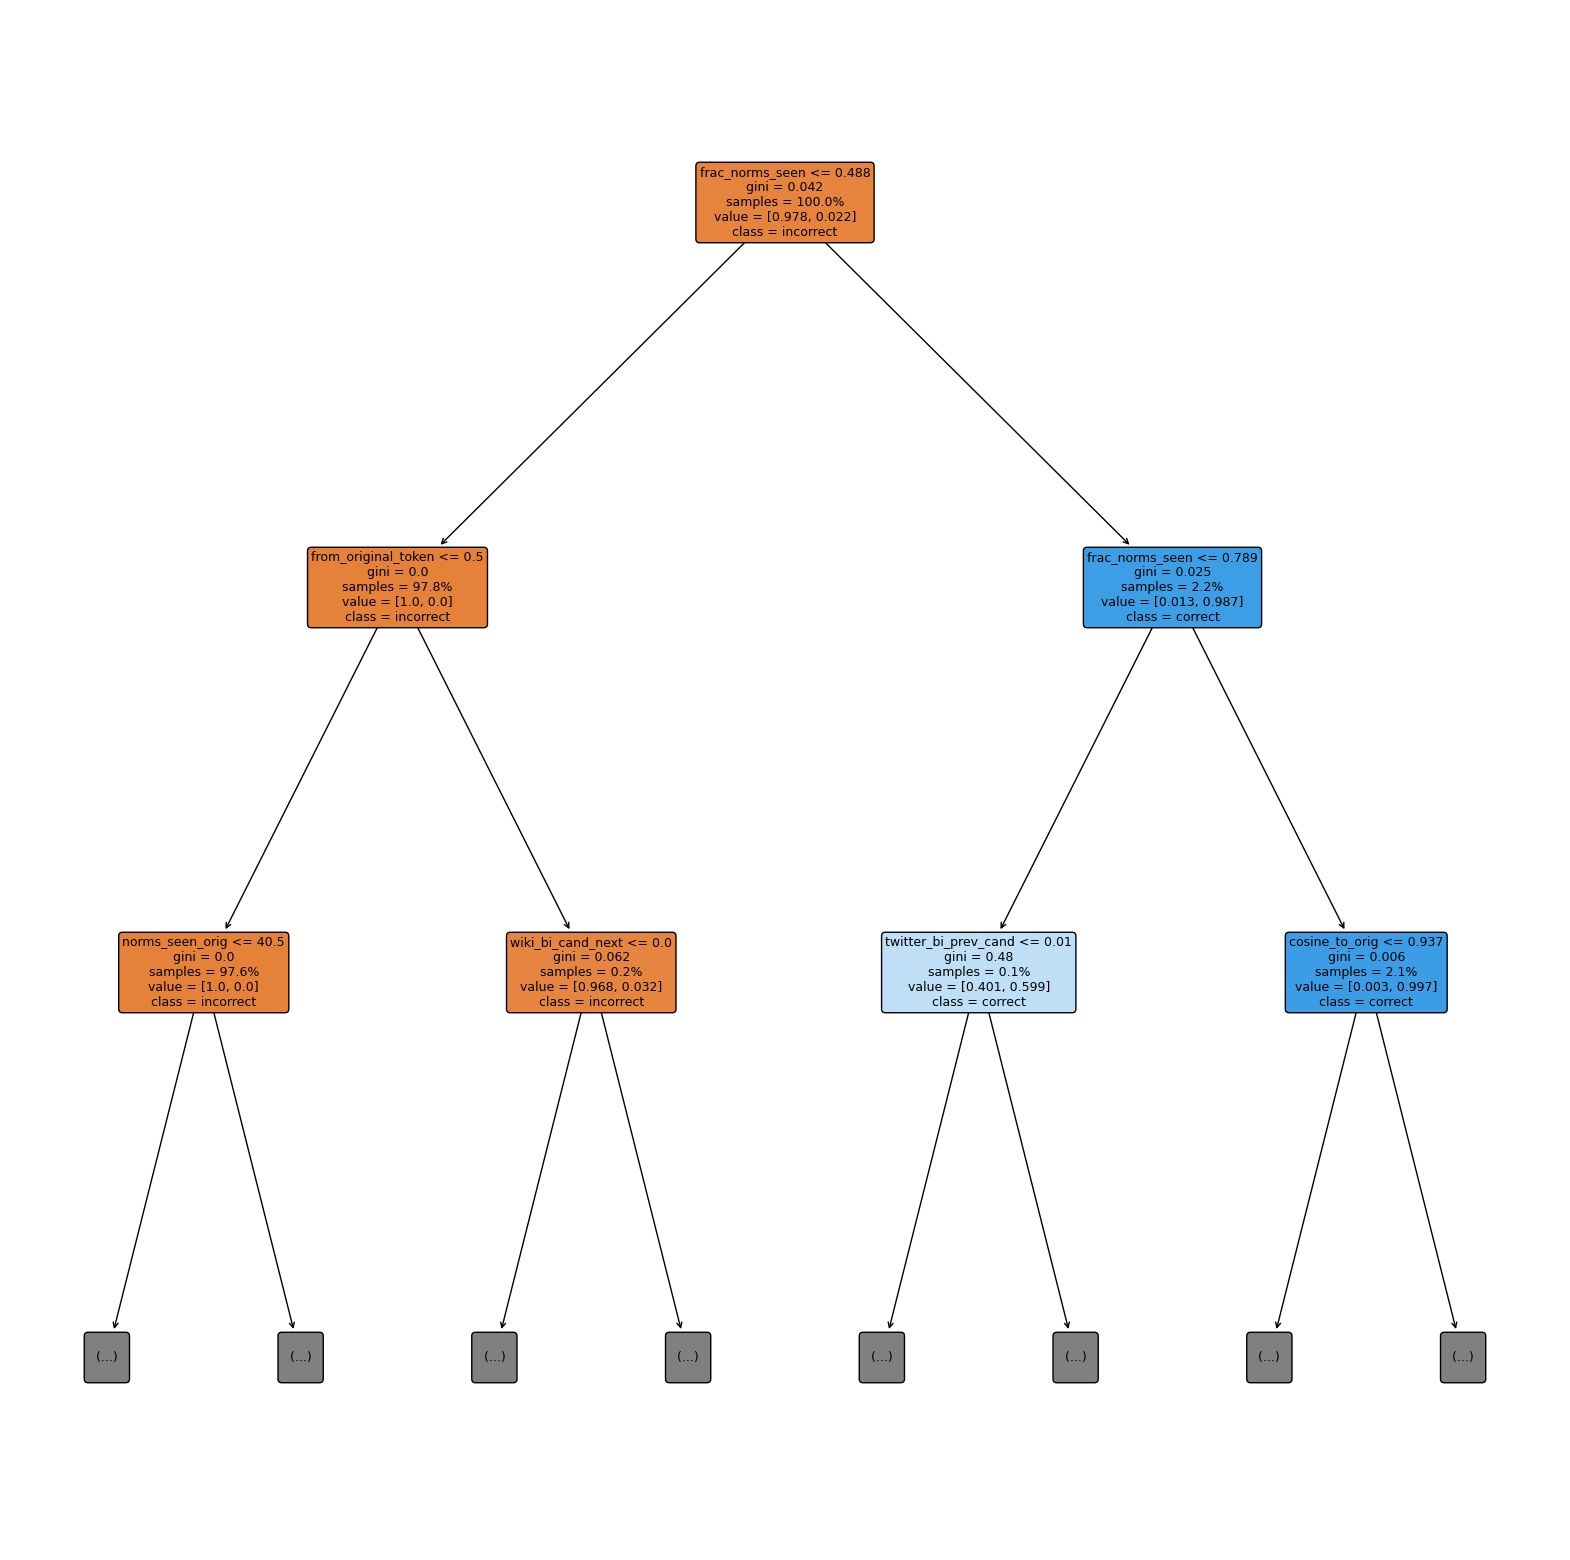

In [40]:
from matplotlib import pyplot as plt
import sklearn.tree

print(dir(clf.estimators_[0].tree_))
print(clf.estimators_[0].tree_.n_leaves)
print(clf.estimators_[0].tree_.max_depth)
print(clf.estimators_[0].tree_.n_node_samples)
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(clf.estimators_[0], max_depth=2, filled=True, proportion=True, rounded=True, class_names=["incorrect", "correct"], feature_names=clf.feature_names_in_.tolist())
plt.show()

In [24]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf.estimators_[0],
                  feature_names=clf.feature_names_in_.tolist(),
                  class_names=["incorrect", "correct"],
                                proportion=True,
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render("test")

'test.png'

In [27]:
clf.feature_names_in_

array(['cosine_to_orig', 'embeddings_rank', 'from_clipping',
       'from_original_token', 'from_split', 'norms_seen',
       'spellcheck_rank', 'in_lexicon', 'length', 'same_order',
       'orig_norms_seen', 'orig_in_lexicon', 'orig_same_order',
       'orig_length', 'twitter_uni', 'twitter_bi_prev', 'twitter_bi_next',
       'wiki_uni', 'wiki_bi_prev', 'wiki_bi_next'], dtype=object)

In [30]:
# ensuring shuffling data works
from lexnorm.models import normalise
from lexnorm.models import random_forest
import importlib
importlib.reload(normalise)
importlib.reload(random_forest)

<module 'lexnorm.models.random_forest' from '/Users/elijoe/Library/Mobile Documents/com~apple~CloudDocs/Documents/2/Diss/lexnorm/src/lexnorm/models/random_forest.py'>

Getting candidates with (joint) highest probabilities per token

In [36]:
clf = load(os.path.join(DATA_PATH, "../models/rf.joblib"))
probs = random_forest.predict_probs(clf, os.path.join(DATA_PATH, "hpc/dev_ngrams.txt"))
max_cands = probs.loc[probs.groupby(["process", "tweet", "tok"])["probs"].transform(max) == probs.probs]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.5s finished


Highest probability candidates with probabilities below 0.5 not from original token - perhaps keep original token in this case?

In [43]:
max_cands.loc[(max_cands.probs < 0.5) & (max_cands.from_original_token != 1)]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,...,process,tweet,tok,twitter_uni,twitter_bi_prev,twitter_bi_next,wiki_uni,wiki_bi_prev,wiki_bi_next,probs
thames link,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,11,1.0,...,2,0,6,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.222608
prowl ing,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9,1.0,...,10,8,8,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.191523
ya,0.465115,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2,NaN,...,45,0,3,13065864,0.000222,1.025573e-05,6849,0.000730,0.000584,0.171454
open,0.209676,NaN,NaN,NaN,NaN,NaN,6.0,1.0,4,NaN,...,6,9,8,6172092,0.000004,3.507725e-04,469082,0.000000,0.000006,0.187157
themselves,0.827675,NaN,NaN,NaN,NaN,NaN,3.0,1.0,10,NaN,...,20,0,16,1362218,0.000062,2.422520e-05,177818,0.000000,0.000000,0.222408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
can,0.228512,NaN,NaN,NaN,NaN,NaN,15.0,1.0,3,NaN,...,27,6,2,71160951,0.000198,1.545792e-07,1938264,0.000000,0.000000,0.195511
not,0.173422,NaN,NaN,NaN,NaN,NaN,15.0,1.0,3,NaN,...,10,8,16,100452619,0.000356,1.124908e-06,4174421,0.000270,0.000000,0.195336
claret a,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,8,1.0,...,26,3,11,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.214866
keep,0.752860,2.0,NaN,NaN,NaN,NaN,NaN,1.0,4,NaN,...,38,3,19,16447532,0.013715,4.985550e-05,172136,0.008243,0.000000,0.195492


Linking gold tokens

In [72]:
from lexnorm.data import normEval
from lexnorm.generate_extract.filtering import is_eligible
from lexnorm.generate_extract import process
importlib.reload(process)
max_cands = process.create_index(max_cands)
max_cands = process.link_to_gold(max_cands, os.path.join(DATA_PATH, "raw/dev.norm"))

Looking at how many non-raw candidates with highest probability are correct if probability below or above 0.5. Just from this random example, >=0.5: 371 correct, 24 incorrect. <0.5: 65 correct, 371 incorrect. In 332 of the latter case, the raw token was correct - seems to motivate being conservative!

In [73]:
max_cands.loc[(max_cands.probs < 0.5) & (max_cands.from_original_token != 1) & (max_cands.index.values != max_cands.gold) & (max_cands.raw == max_cands.gold)]

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,...,next,twitter_uni,twitter_bi_prev,twitter_bi_next,wiki_uni,wiki_bi_prev,wiki_bi_next,probs,tok_id,gold
ma nan,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6,1.0,...,dund,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.212320,6,manan
mini i,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN,6,1.0,...,aav,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.203984,12,minii
skills,0.834030,2.0,1.0,NaN,NaN,NaN,5.0,1.0,6,1.0,...,level,738084,0.000832,5.256854e-04,72373,0.000124,0.000193,0.227671,43,skill
wild ing,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8,1.0,...,last,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.222099,71,wilding
you,0.346203,NaN,NaN,NaN,NaN,NaN,5.0,1.0,3,NaN,...,:d,374989834,0.000000,2.131311e-04,431347,0.000000,0.000000,0.219711,74,yoh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
see,0.203486,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3,NaN,...,to,43600979,0.000001,6.337243e-04,323620,0.000000,0.004984,0.248927,6791,zee
range ra,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8,1.0,...,hearts,1,0.000000,0.000000e+00,1,0.000000,0.000000,0.222099,6809,rangera
heart,0.760539,NaN,NaN,NaN,NaN,NaN,4.0,1.0,5,NaN,...,hibs,7957991,0.000000,0.000000e+00,167538,0.000000,0.000000,0.220209,6810,hearts
his,0.234643,NaN,NaN,NaN,NaN,NaN,4.0,1.0,3,NaN,...,falkirk,40429274,0.000003,2.968146e-07,11999277,0.000000,0.000002,0.206385,6811,hibs


In [54]:
random_forest.predict_normalisations(random_forest.predict_probs(clf, os.path.join(DATA_PATH, "hpc/dev_processed_nocap.txt")).sort_values(["process", "tweet", "tok"]))

KeyError: "['prev', 'next'] not found in axis"

In [77]:
from lexnorm.models.normalise import prep_train
# trying svc
from sklearn import svm
clf = svm.SVC()
data = pd.read_csv(
        os.path.join(DATA_PATH, "hpc/train_processed_annotated_nocap.txt"), index_col=0, keep_default_na=False, na_values=""
    ).sample(frac=1, random_state=42)
train_X, train_y = prep_train(data)

In [78]:
train_X.s

beguile         0.0
india           0.0
creased         0.0
bestseller's    0.0
benefactors     0.0
               ... 
android's       0.0
derision        0.0
onslaught       0.0
meteor's        0.0
butcher's       0.0
Name: correct, Length: 2977600, dtype: float64